<a href="https://colab.research.google.com/github/jibintom/Machine-Learning-Codebasics-/blob/main/9.%20Decision%20Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree

When our data set is simple its easy to draw decision boundary using LogisticRegression but if our data set is little complex we have to split and our dataset again and and again to come up with decision boundary and this is what ***Decision Tree Alogoritham*** does


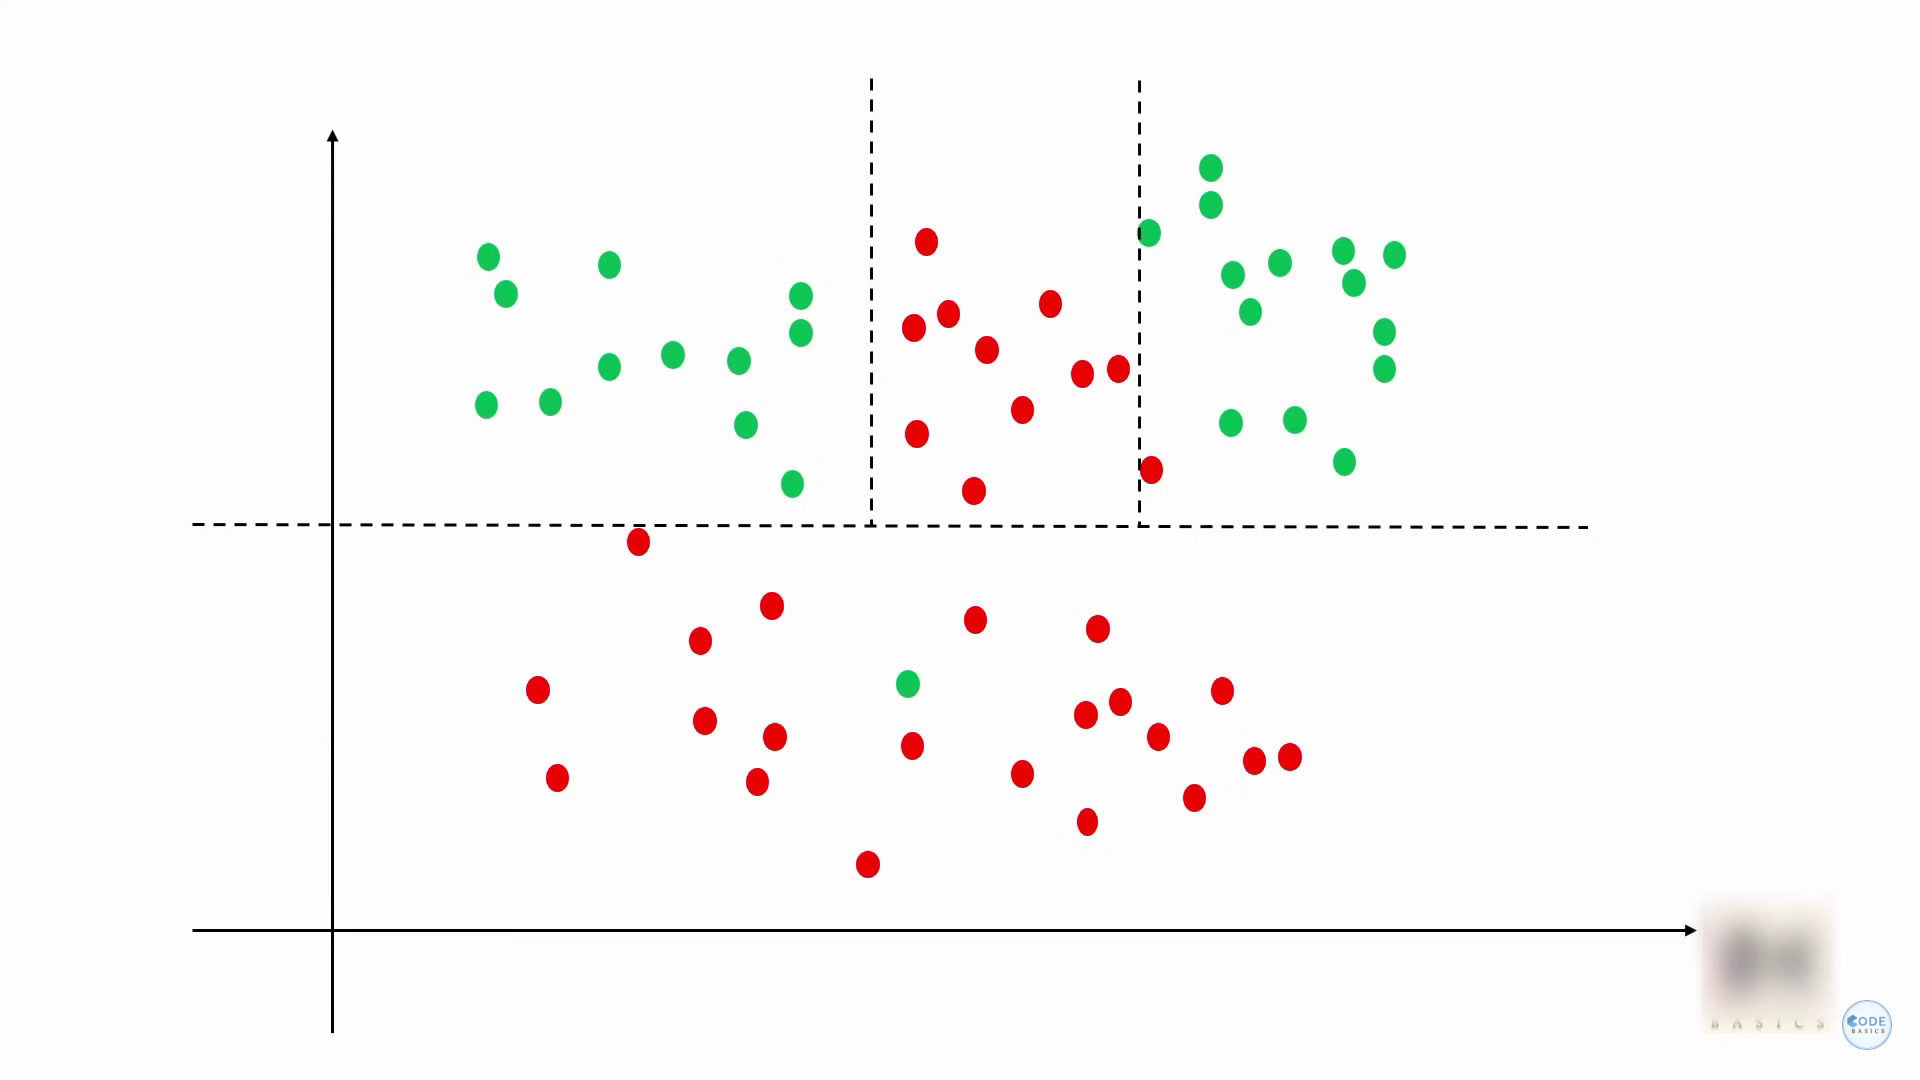


so we are going solve this dataset which predict wheather the salary is above 100k based on his degree and company. So first divide based on company under that Job postion then comes the Degree


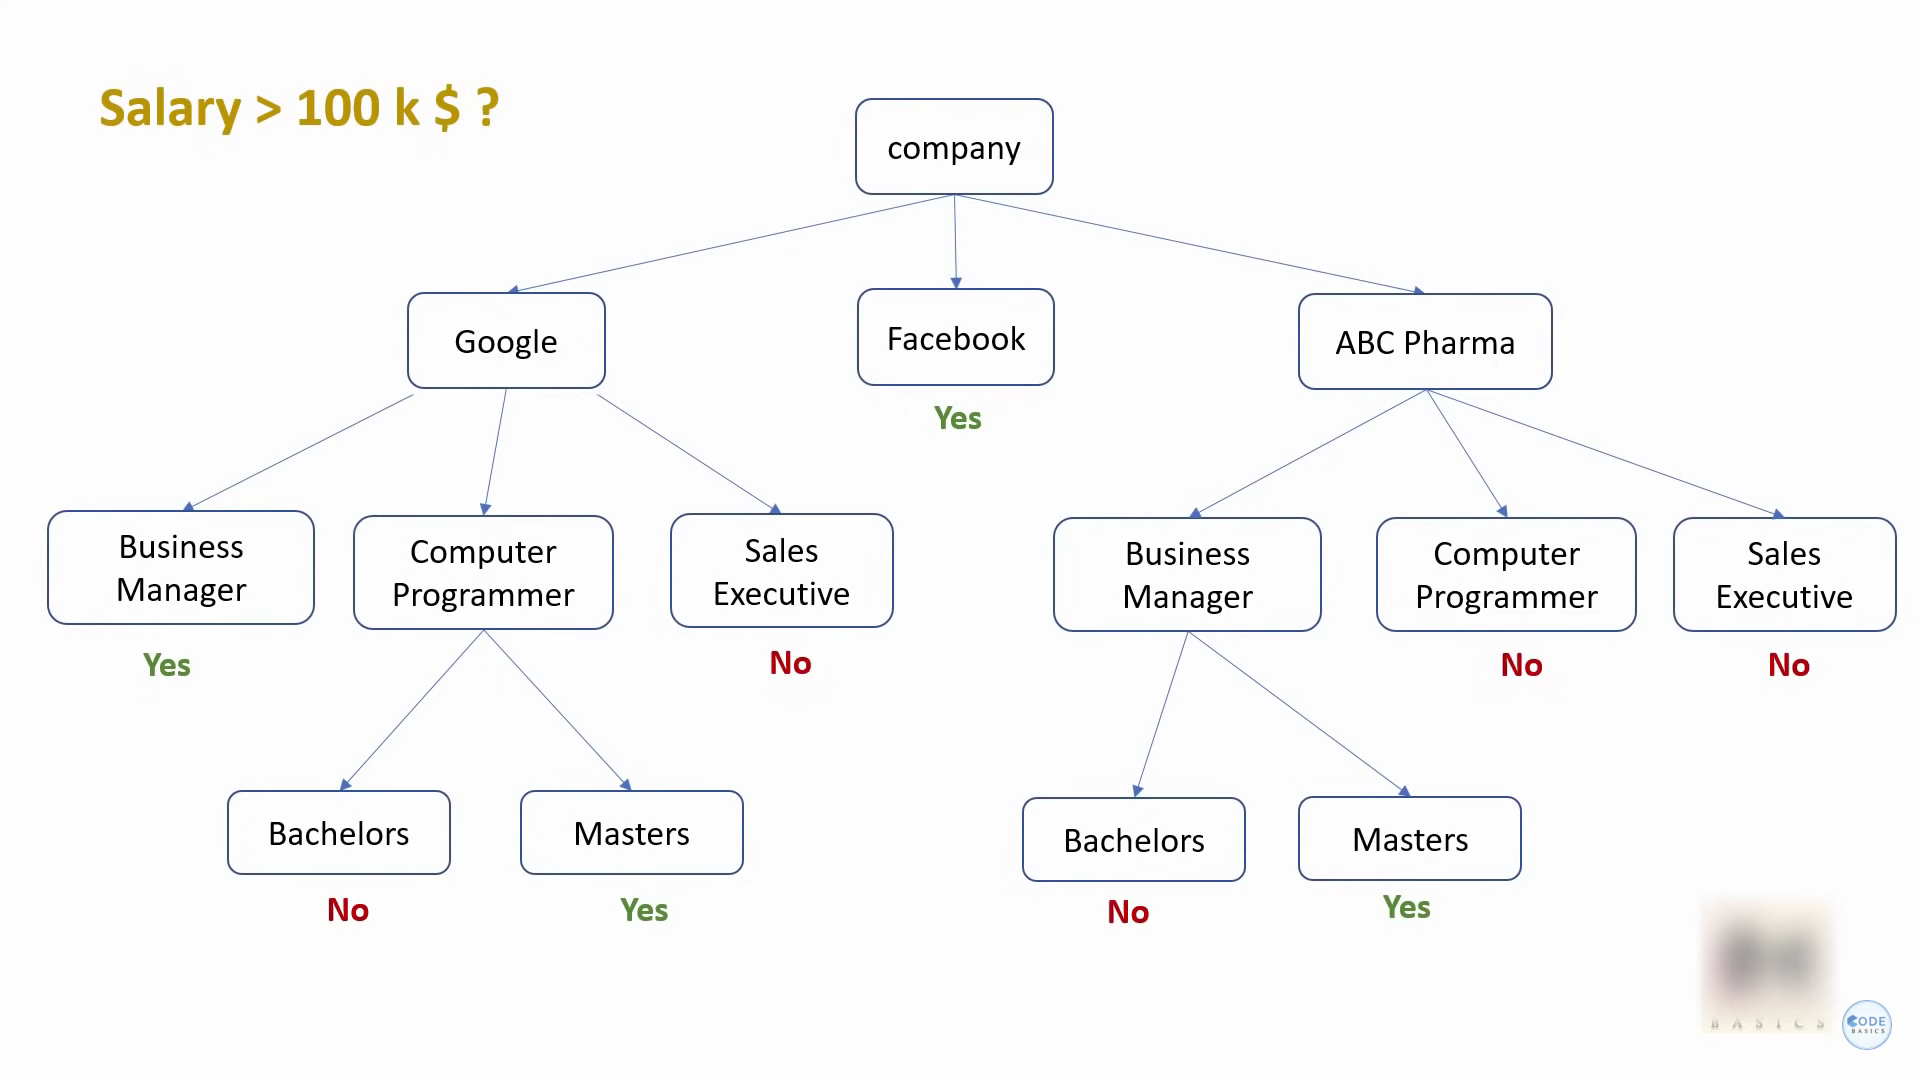



we might have used the Degree to claasify the dataset but in such cases we have an High Entropy result(*Entropy is measure of randomness*) which is not suitable for prediction



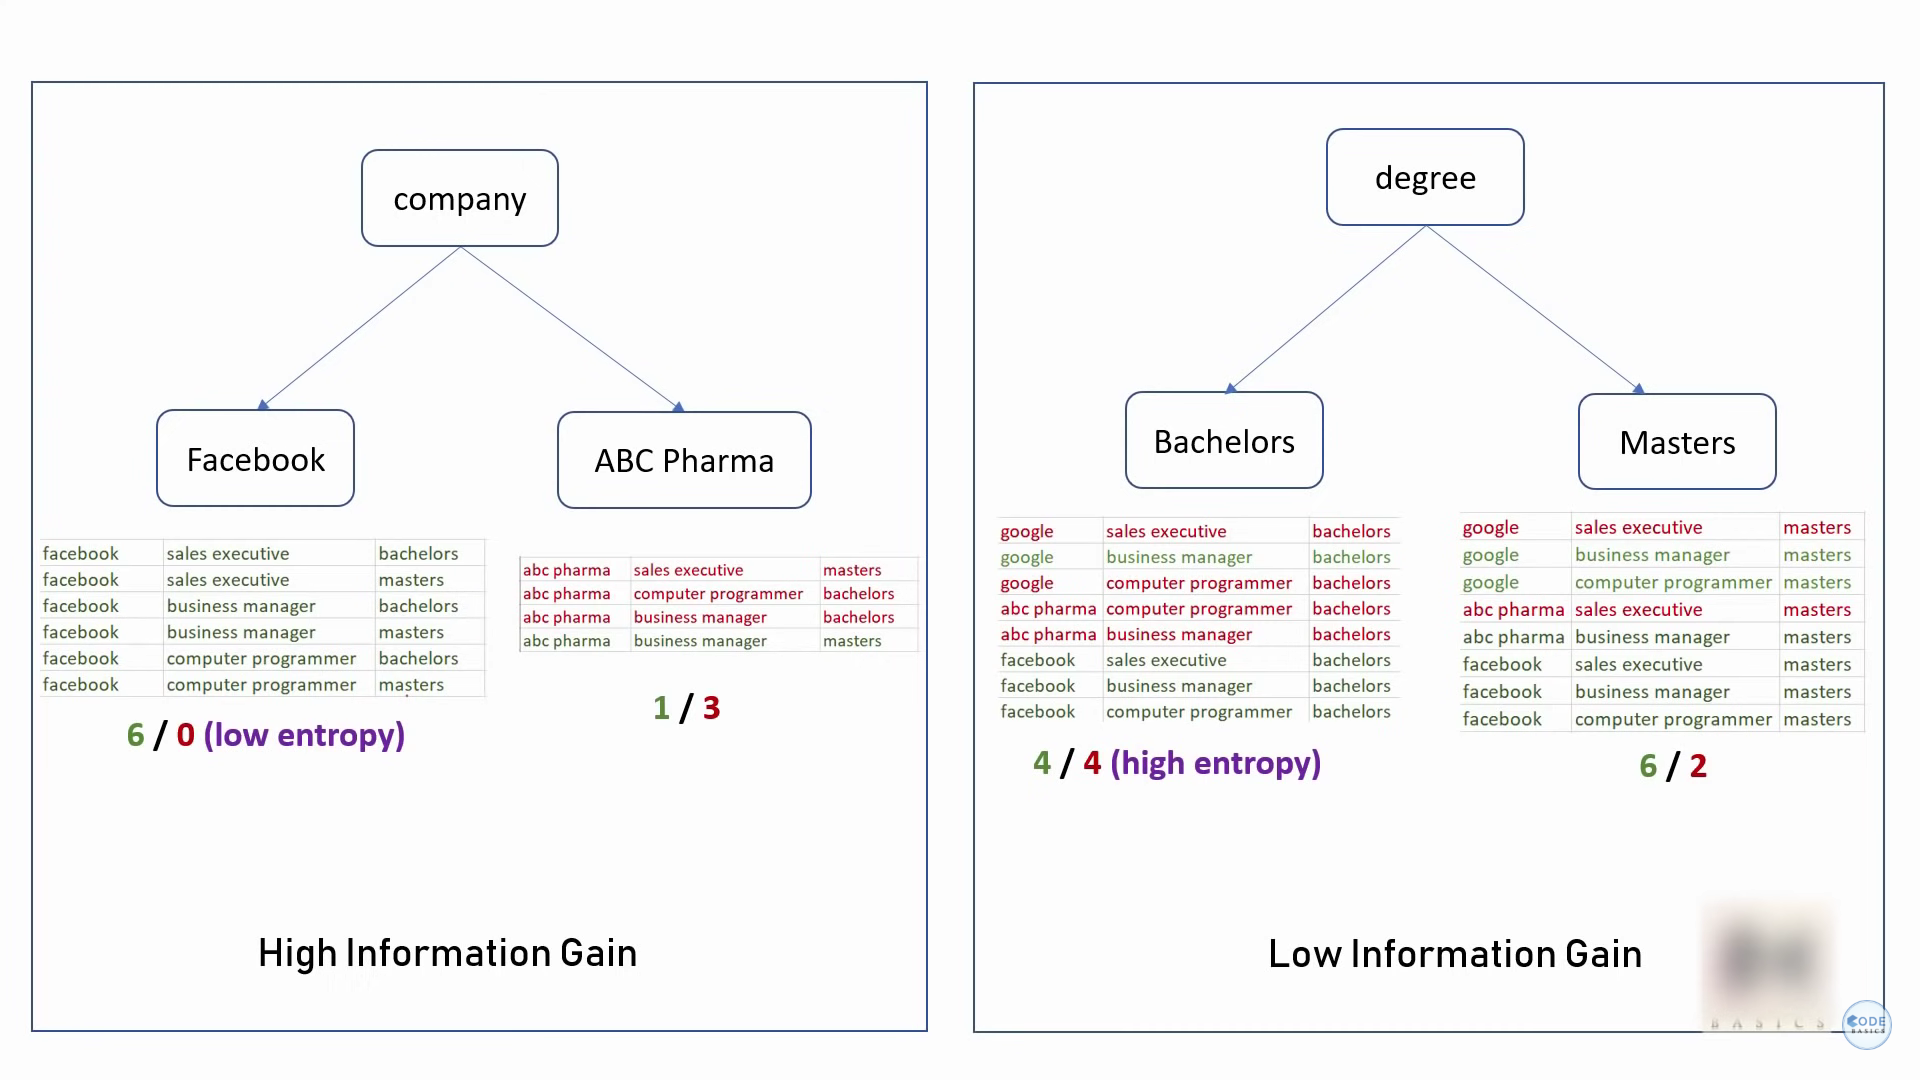


### Gini Impurity

We also may come across the term **Gini Impurity** its nothing but the impurity present in our data set, for an example if we have  analysed the below data its clear that majority of data in the bottom side is Red where as one of them is green


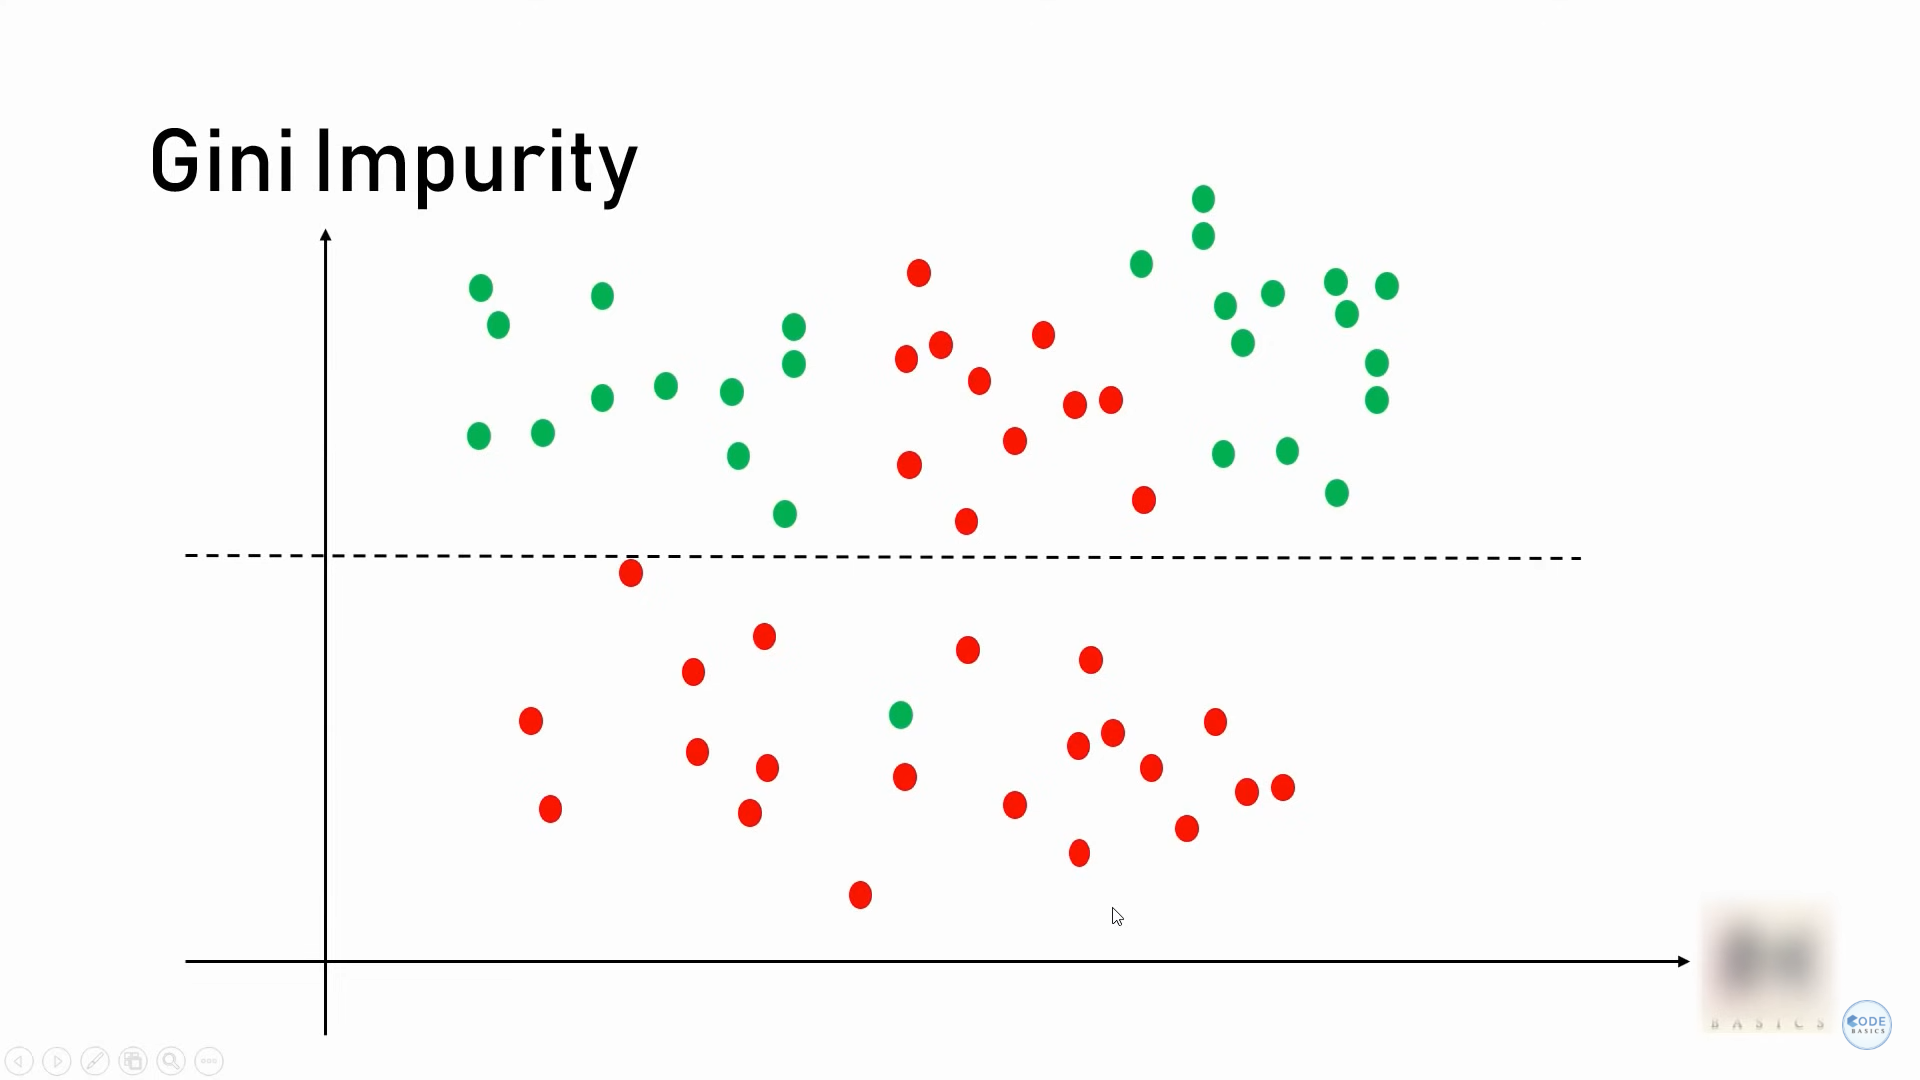

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("salaries_9.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
input=df.drop("salary_more_then_100k", axis=1)
input.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [4]:
target=df["salary_more_then_100k"]
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

**Visulize the Data**

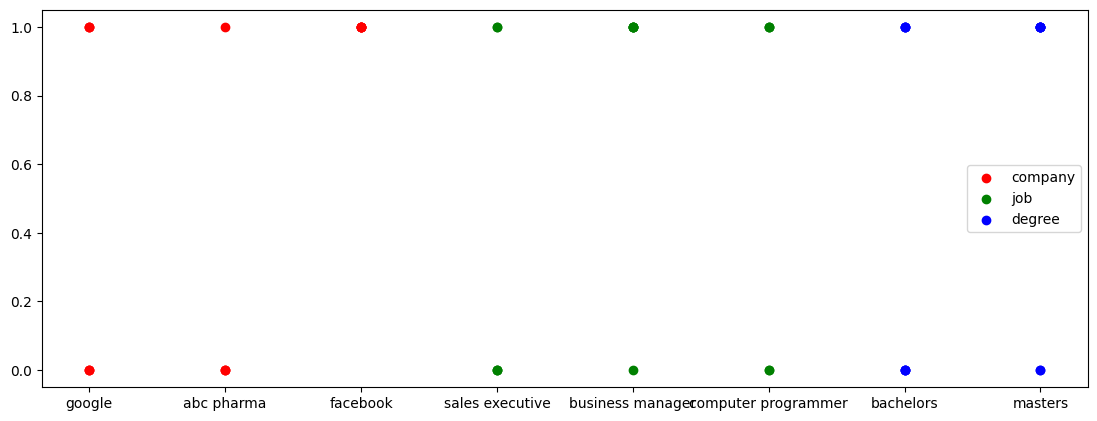

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(13.5,5), 'figure.dpi':100})
plt.scatter(df.company,df.salary_more_then_100k, color="red", label="company")
plt.scatter(df.job,df.salary_more_then_100k, color="green", label="job")
plt.scatter(df.degree,df.salary_more_then_100k, color="blue",label="degree")
plt.legend()

**1. Handling Categorical Values using get_dummies**

In [6]:
company_dummie=pd.get_dummies(df.company)
company_dummie.head()

,abc pharma,facebook,google
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [7]:
job_dummie=pd.get_dummies(df["job"])
degree_dummies=pd.get_dummies(df.degree)

In [8]:
final_input=pd.concat([company_dummie,job_dummie,degree_dummies], axis=1)
final_input.head()

,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0


**Train the Model**

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(final_input,target)

DecisionTreeClassifier()

In [10]:
model.predict([[0,0,1,0,0,1,1,0]])

array([0])

2. Handling Categorical Values using Label Encoder

In [11]:
input.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

company_le=le.fit_transform(input.company)
job_le=le.fit_transform(input.job)
degree_le=le.fit_transform(input.degree)
input["company_le"]=company_le
input["job_le"]=job_le
input["degree_le"]=degree_le
input.head(7)

,company,job,degree,company_le,job_le,degree_le
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1


In [13]:
input_le=input.drop(["company","job","degree"], axis=1) #dropping multiple values at a time
input_le.head(7)

,company_le,job_le,degree_le
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
le_dt=DecisionTreeClassifier()
le_dt.fit(input_le,target)

DecisionTreeClassifier()

In [15]:
le_dt.predict([[2,0,1]])

array([1])

In [16]:
def predict(j,t,v):
  print("Choose the Prediction Method")
  i=print(int(input("Enter 1. LogisticRegression,2. DecisionTree: ")))
  if i==1:
    lg_result=model.predict([[j,t]])
    print("Result is ", lg_result)
  if i==2:
    lg_result=le_dt.predict([[j,t,v]])
    print("Result is ", lg_result)

### **Exercise**

In [51]:
df_e=pd.read_csv("titanic_9.csv")
df_e.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explore the Data**

In [52]:
df_e.shape

(891, 12)

In [53]:
df_e.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
u=df_e[["Pclass","Sex","Age","Fare"]]
u.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [69]:
u.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [70]:
age_mean=df_e.Age.mean()
age_mean

29.69911764705882

In [71]:
u1=u.fillna(age_mean)
u1.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [83]:
u1.Pclass.unique()

array([3, 1, 2])

In [75]:
v=df_e["Survived"]
v.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Visualize the Data**

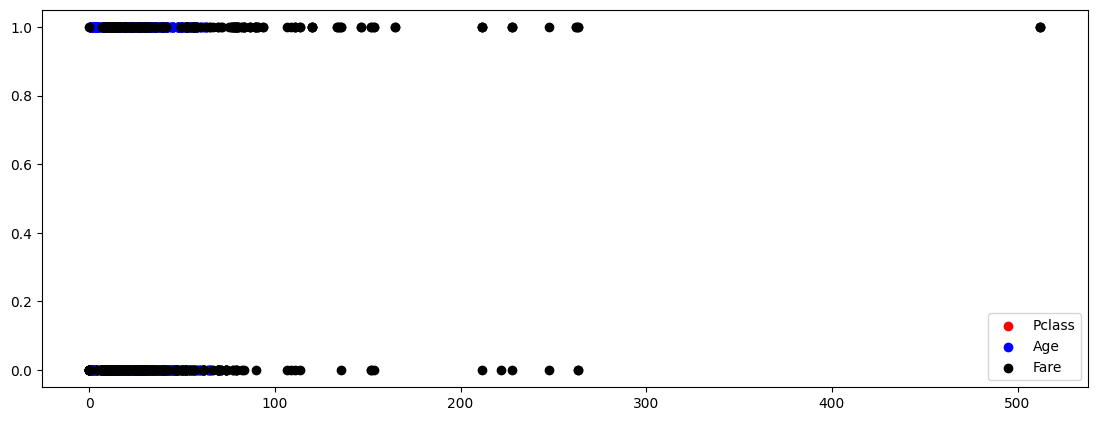

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(13.5,5), 'figure.dpi':100})
plt.scatter(u1.Pclass, df_e.Survived, color="red", label="Pclass")
#plt.scatter(u1.Sex, df_e.Survived, color="green", label="Sex")
plt.scatter(u1.Age, df_e.Survived, color="blue",label="Age")
plt.scatter(u1.Fare, df_e.Survived, color="black",label="Fare")
plt.legend()

**Handling Categorical Value**

In [86]:
sex_gd=pd.get_dummies(u.Sex)
sex_gd

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sex_le=le.fit_transform(u.Sex)

In [91]:
u1["sex_le"]=sex_le
u2=u1.drop("Sex",axis=1)
u2.head()

,Pclass,Age,Fare,sex_le
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


**Train the Model**

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(u2,v, test_size=.2, random_state=10)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [119]:
y_predict=dt.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [120]:
dt.score(x_test,y_test)

0.8044692737430168

In [113]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [114]:
lg.score(x_test,y_test)

0.8268156424581006